<a href="https://colab.research.google.com/github/Sinchiguano/3D_Pose_Estimation_YuMiArm_ABB/blob/master/week_3_1_features_and_basis_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# from sklearn.linear_model import LinearRegression
# import numpy as np
# import matplotlib.pyplot as plt




import pandas as pd

url='https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/salary_2015.csv'
df = pd.read_csv(url)

print(df.head(3))
print(df['gross'].dtypes)


print('//////////////////////////////')

df['gross'] = df['gross'].str.replace(',', '')
df['gross'] = df['gross'].astype(int)
print(df['gross'].dtypes)


   year  location       first   last           title    gross  regular  \
0  2015  Berkeley        ANNE  AABOE   BUS SYS ANL 4  124,454  124,454   
1  2015  Berkeley       DAVID  AAKER  RECALL FACULTY    2,500        0   
2  2015  Berkeley   ELIZABETH   ABEL         PROF-AY  138,775  138,775   

  overtime  other  
0        0      0  
1        0  2,500  
2        0      0  
object
//////////////////////////////
int64


In [32]:
meanSalaries=pd.DataFrame(df.groupby('title')['gross'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False))
print(meanSalaries.head(6))
print(meanSalaries.shape)
print(meanSalaries.dtypes)
print(type(meanSalaries))



print('//////////////////////////////')
# meanSalaries=pd.DataFrame(df.groupby(['title'])['gross'].mean())
# print(meanSalaries.head(3))
# print(meanSalaries.shape)
# print(meanSalaries.dtypes)


                               title       mean
592                     CHF INV OFCR  1106688.0
2620  SR MGN DIR FIXED INCOME ASSETS  1016853.0
1181               EXEC VP UC HEALTH   786745.0
2954                 VC AND DEAN SOM   634752.0
824                      COO MED CTR   609592.2
2189           PRESIDENT OF THE UNIV   584503.0
(3047, 2)
title     object
mean     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
//////////////////////////////


There are a lot of CEO, CFO, CMO titles in the upper salary titles. Let's create a "C-SUITE" title category, and then create a dataframe that contains all of these titles, plus all of the academic year faculty.


In [40]:
# print(meanSalaries['title'].values[:30])
df['title']=df['title'].str.replace('.*C[EFM]O.*', 'C-SUITE')
msdf=pd.DataFrame(df.groupby('title')['gross'].count().reset_index(name='count').sort_values('count', ascending=False))
print('..................................................')
print(msdf.head(6))

print('..................................................')
ms_prof=msdf[(msdf['title'].str.contains('PROF-AY'))|(msdf['title'].str.contains('C-SUITE'))]
print(ms_prof.head(10))

<ipython-input-40-c6e562afa49b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']=df['title'].str.replace('.*C[EFM]O.*', 'C-SUITE')


..................................................
                  title  count
2653             STDT 2  14914
2661             STDT 4  13128
2870  TEACHG ASST-GSHIP  12964
2657             STDT 3  10669
2650             STDT 1  10665
669        CLIN NURSE 2   8574
..................................................
                    title  count
2241              PROF-AY   3334
317         ASSOC PROF-AY   1387
2244        PROF-AY-B/E/E   1139
365          ASST PROF-AY    980
368    ASST PROF-AY-B/E/E    366
319   ASSOC PROF-AY-B/E/E    313
2246          PROF-AY-LAW    158
340      ASST ADJ PROF-AY    142
90            ADJ PROF-AY     83
286     ASSOC ADJ PROF-AY     49


In [42]:
print(ms_prof['title'].unique())

['PROF-AY' 'ASSOC PROF-AY' 'PROF-AY-B/E/E' 'ASST PROF-AY'
 'ASST PROF-AY-B/E/E' 'ASSOC PROF-AY-B/E/E' 'PROF-AY-LAW'
 'ASST ADJ PROF-AY' 'ADJ PROF-AY' 'ASSOC ADJ PROF-AY'
 'HS ASST CLIN PROF-AY' 'ADJ PROF-AY-B/E/E' 'ACT PROF-AY-LAW' 'C-SUITE'
 'ADJ PROF-AY-1/9' 'HS ASSOC CLIN PROF-AY' 'ASST ADJ PROF-AY-1/9'
 'ASST ADJ PROF-AY-B/E/E' 'HS CLIN PROF-AY' 'ACT ASST PROF-AY'
 'ASSOC ADJ PROF-AY-B/E/E' 'ADJ PROF-AY-1/9-B/E/E' 'ASSOC ADJ PROF-AY-1/9'
 'ASST PROF-AY-1/9' 'ASSOC ADJ PROF-AY-1/9-B/E/E' 'ASST PROF-AY-1/9-B/E/E'
 'ASST ADJ PROF-AY-1/9-B/E/E' 'ACT PROF-AY' 'ACT ASST PROF-AY-B/E/E'
 'ACT ASSOC PROF-AY-B/E/E' 'ACT ASSOC PROF-AY' 'PROF-AY-1/9-B/E/E'
 'VSTG PROF-AY-1/9-BUS/ECON/ENGR' 'ACT ASSOC PROF-AY-1/9-B/E/E'
 'PROF-AY-1/9-BUS/ECON/ENG-RECAL' 'PROF-AY-BUS/ECON/ENG-RECALLED'
 'ASSOC PROF-AY-1/9-B/E/E']


(7982, 9)
Index(['ACT ASST PROF-AY', 'ASST ADJ PROF-AY', 'ASSOC ADJ PROF-AY',
       'ADJ PROF-AY', 'ASST PROF-AY', 'ASSOC PROF-AY', 'ASST PROF-AY-B/E/E',
       'ASSOC PROF-AY-B/E/E', 'PROF-AY', 'PROF-AY-B/E/E'],
      dtype='object', name='title')


[Text(0, 0, 'ACT ASST PROF-AY'),
 Text(1, 0, 'ASST ADJ PROF-AY'),
 Text(2, 0, 'ASSOC ADJ PROF-AY'),
 Text(3, 0, 'ADJ PROF-AY'),
 Text(4, 0, 'ASST PROF-AY'),
 Text(5, 0, 'ASSOC PROF-AY'),
 Text(6, 0, 'ASST PROF-AY-B/E/E'),
 Text(7, 0, 'ASSOC PROF-AY-B/E/E'),
 Text(8, 0, 'PROF-AY'),
 Text(9, 0, 'PROF-AY-B/E/E'),
 Text(10, 0, 'PROF-AY-LAW'),
 Text(11, 0, 'C-SUITE')]

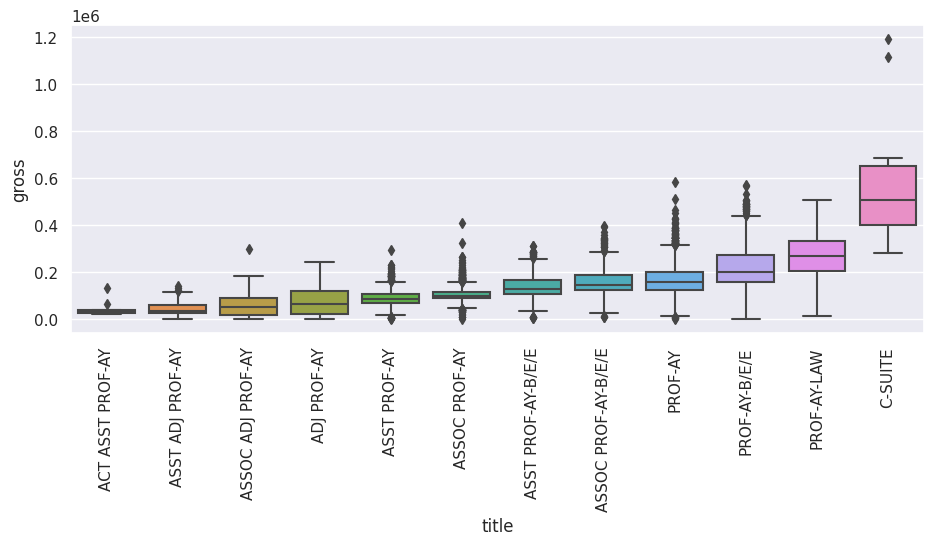

In [51]:
titles = [
          'C-SUITE',
          'PROF-AY-LAW', 
          'ASST PROF-AY', 'ASSOC PROF-AY', 'PROF-AY',
          'ASST ADJ PROF-AY', 'ASSOC ADJ PROF-AY', 'ADJ PROF-AY',  'ACT ASST PROF-AY', 
          'PROF-AY-B/E/E', 'ASSOC PROF-AY-B/E/E', 'ASST PROF-AY-B/E/E'
         ]
mask=df['title'].isin(titles)
df_profs=df[mask]
print(df_profs.shape)


df_index=df_profs.groupby('title')['gross'].median().sort_values().index
print(df_index[:10])

import seaborn as sns

sns.set(rc={'figure.figsize':(11,4)})
ax=sns.boxplot(x='title',y='gross',data=df_profs,order=df_index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)